# Theoretischer Hintergrund
Heutzutage werden in allen Branchen und Unternehmensbereichen enorme Datenmengen gespeichert und verarbeitet.
Diese Daten können zum Beispiel Namen, Adressen, Kaufinformationen und/oder Gesundheitsdaten sein.
Durch Data Mining ist es möglich Kundenverhalten zu analysieren und Muster in den gesammelten Daten zu erkennen.
In diesem Kapitel wird speziell auf das Data Mining Verfahren der Assoziationsanalyse eingegangen.

## Data Mining

Data Mining an sich meint das "Schürfen oder Graben" in bereits existierenden Datenbanken. Hierbei werden mit Hilfe
von intelligenten Suchalgorithmen und statistischen Methoden neue Erkenntnisse aus den gegebenen Daten extrahiert um so
den bisherigen Wissensstand zu erweitern und Muster in den Daten zu erkennen.
Durch dieses neu erworbene Wissen kann ein Unternehmen beispielsweise Fragen beantworten wie:

Welche Produkte aus meinem Warensortiment werden oft zusammen gekauft?

Welche Güter biete ich welcher Kundengruppe an?

Welche Kunden befinden sich in meiner Hauptzielgruppe?

Welche Entwicklung/welcher Trend ist zu erwarten?

Data Mining soll es somit ermöglichen Aussagen über die Zukunft z.B. Kundentrends zu prognostizieren. Die im Prozess einbezogenen Daten müssen
vorher bereinigt werden so dass diese für die anschließende Analyse konsistent und qualitativ hochwertig sind.
Das geschieht vorerst durch das Aufspüren und Entfernen von Ausreißen und dem anschießenden Clustering (Klassifizierung)
der vorliegenden Daten.



![DMP](DataMiningProcess.png "Data Mining Prozess")
: Der Data Mining Prozess [CAR]

## Assoziationsanalyse
Die Assoziationsanalyse ist ein Data Mining Verfahren, durch welches signifikante Abhängigkeiten zwischen Merkmalen
beschrieben werden können.
Sie leitet sich von der sogenannten Warenkorbanalyse ab, in welcher herausgestellt werden soll welche Produkte häufig
zusammen gekauft werden. Meist wird die Assoziationsanalyse weiterhin in diesem Bereich angewendet findet
aber auch Einsatz in anderen Gebieten wie beispielsweise der Versicherungsbranche oder im Gesundheitswesen [PET05].
Statt nach Produkten die gemeinsam gekauft werden wird dabei nach Elementen gesucht, die oft in Kombination auftreten.
Zum Beispiel ist das Auftreten eines Herzinfarkts oder Schlaganfalls bei einem Patienten der unter Arteriosklerose leidet
wahrscheinlicher als bei einem Patienten ohne Arteriosklerose.

Den meisten Laien ist die Assoziationsanalyse bereits als Warenkorbanalyse aus Online-Shopping-Portalen wie Amazon bekannt.
Hier soll das Kaufverhalten durch die Assoziationsanalyse angeregt und der Profit somit gesteigert werden.
Dies nimmt der Nutzer als individuelle Empfehlungen für seine Person wahr. Es werden dem Nutzer ähnliche Produkte empfohlen,
die er bereits erworben hat. Beispielsweise mit den Hinweisen wie:

"Wird oft zusammen gekauft"

"Empfehlungen für Sie"

oder auch

"Kunden die diesen Artikel gekauft haben, kauften auch"



![SA](Amazon_Ass.png "Screenshot Amazon")

: Assoziationsanalyse bei Amazon

### Assoziationsreglen
Bei der Assoziationsanalyse wird nach Mustern in Daten gesucht um dann auf eine Regelhaftigkeit zu schließen.
Durch das vorangegangene clustern der Daten können Assoziationsregeln in ihnen gesucht werden.
Hier ist meist eine Visualisierung durch Entscheidungsbäume zum besseren Verständnis ratsam.
Jede Assoziationsregel besteht aus einem **Regelrumpf** (Prämisse) $Y$ und einem **Regelknopf** (Konsequenz) $Z$.
Wenn das Ereignis $Y$ tritt mit einer bestimmten Wahrscheinlichkeit auch Ereignis $Z$ ein:
$$\begin{aligned} Y\to Z\\\end{aligned}$$ $Y$ und $Z$ werden dabei als disjunkte Ereignisse angesehen [SCH12].




#### Support und Konfidenz
Um etwas über die Qualität von Assoziationsregeln auszusagen werden zwei Interessantheitsmaße verwendet die
**Support** und der **Konfidenz** einer Regel. Der Support zeigt die Anzahl der Transaktionen eines Ereignisses
im Verhältnis zur Gesamtmenge von Transaktionen
. Eine Transaktion ist in der Warenkorbanalyse beispielsweise
der Einkauf von einzelnen oder kombinierten Produkten eines Kunden. Der Support einer Transaktionsmenge/eines Ereignisses
wird wie folgt definiert:

$$
support(Y)=\frac{|\{x^k\in X : Y \subset x^k\}|}{n}
$$ 

Der Support einer Assoziationsregel kann
mit der Vereinigung von $Y$ und $Z$ gleichgesetz werden: 

$$
support(Y\to Z)=Y\cup Z
$$ 

Die Konfidenz wird aus dem Verhältnis der Tansaktionen welche das Ereignis $Y$ erfüllen und derer welche sowohl $Y$
als auch $Z$ enthalten berechnet:

$$
confidence(Y\to Z)= \frac{support(Y\to Z)}{support(Y)}
$$ 

Allgemein gilt je größer die Interessantheitsmaße Support und Konfidenz umso höher ist die Qualität der Assoziationsregel.
Diese haben jeweils einen möglichen Ergebnisbereich von 0 bis 1.
Um zu vermeiden, dass die Konfidenz einer Assoziationsregel nur den Support einer der beiden Ereignisse widerspiegelt
wird hier zu das Lift Maß verwendet. Je höher der Lift umso außergewöhnlicher ist der Zusammenhang zwischen $Y$ und $Z$.

$$
lift(Y\to Z)=\frac{confidence(Y\to Z)}{support(Z)}
$$ 
[SAA03][SCH12]



### Der Apriori Algorithmus
Der Apriori Algorithmus ist das gängigste Verfahren zum Finden von Assoziationsregeln in einer Datenbank.
Der Algorithmus arbeitet stufenweise. Zuerst sollten dazu für die Assoziationsregeln ein minimaler Support $minsup$
und eine minimale Konfidenz $mincon$ festgelegt werden. Umso größer der Datensatz umso höher können diese Minima gesetzt werden.
Dadurch wird sicher gestellt nur Regeln mit einer hohen Konfidenz und einem hohen Support in die Regelbeschreibung
aufzunehmen, sodass diese nicht unendlich viele kaum gültige Regeln aufweist.

$$\begin{aligned}
s_{min}\in (0,1)\\c_{min}\in (0,1)\end{aligned}$$

Es wird somit nach Regeln mit folgenden Eigenschaften gesucht:

$$\begin{aligned}
support(Y\to Z)\geq s_{min}\\confidence(Y\to Z)\geq c_{min}\end{aligned}$$

Im weiteren Verlauf wird zur Erklärung von der Warenkorbanalyse ausgegangen.
Beim Apriori Algorithmus wird die Erzeugung der Assoziationsregeln nun in zwei Schritte zerlegt:

1. Alle Ereignisse oder Ereigniskombinationen deren Support über dem definierten $minsup$ liegt
werden identifiziert. Diese bezeichnet man als häufig auftretende Ereignisse/Ereigniskombinationen (Itemsets).

$$
support(X) \geq s_{min}$$

2. Alle Assoziationsregeln deren Konfidenz sich über dem definierten $mincon$ befindet und aus den
in Schritt 1 definierten häufig auftretenden Itemsets stammen werden bestimmt.

$$
confidence(X) \geq c_{min}$$

Ein verwendetes Itemset $X$ (ein Einkauf) besteht aus der Länge 4k$. $k$ stellt hierbei die Menge an Items
welche sich im Itemset befinden dar. Die Items werden lexikographisch angeordnet,
da die Reihenfolge in welcher sie an der Transaktion beteiligt sind nicht von Bedeutung für die Analyse ist d.h.

$$
x_{1}\leq x_{2} \leq ...\leq x_{k}$$

Durch diese Ordung gibt es weniger Anordnungsmöglichkeiten der Items im Itemset ($\frac{n!}{(n-k!)}$ statt $\frac{n!}{k!(n-k!)}$)
und der Analyseaufwand kann enorm verringert werden. Beim Apriori Algorithmus wird zusätzlich davon ausgegangen, dass
falls ein Itemset nicht häufig ist die darin enthaltenen Items ebenfalls selten erworben werden.
Der Algorithmus lässt sich wie folgt beschreiben ($I$=Items, $T$=Transaktionen):


![AA](Algorithmus.png "Apriori Algorithmus")
:Apriori Algorithmus [RIE08]

![AA](AprioriGen.png "AprioriKandidatenGenerierung")
:Generierung von Apriori-Kandidaten [RIE08]

Im folgenden Beispiel wird aufgezeigt wie der Apriori Algorithmus selbst arbeitet. Hier werden 8 Transaktionen betrachtet, wobei der absolute Mindestsupport bei 2 liegt, die Iteration wiederum beträgt k=3 also beinhaltet es alle drei Interessantheitsmaße des Algorithmus (Support, Konfidenz und Lift). Danach erfolgt die Bildung der möglichen Regel-Kandidaten. Wenn die Ereignisse mit den höchsten Interessantheitsmaßen bearbeitet sind wird auf die nächst tiefere Stufe gewechselt.

![AP](AprioriBeispiel.png "Beispiel Apriori")
: Beispiel für den Apriorli Algorithmus [PET05]

# Praktischer Hintergrund
/nZur praktischen Anwendung der Assoziationsanalyse in R wurde eine zufällige Transaktionstabelle erstellt.
 

   Transaktionsnummer  |Geschlecht|   Produkt A   |  Produkt B   |  Produkt C |  Produkt D        
  :----------:|:--------:|:--------:|:--------:|:--------:|:--------:|
      1       |    M     |   Bier     |  Chips      |   Windeln   |  Kaffee         
      2       |    W     |   Windeln  |  Kuchen     |   Kaffee    |  Milch                 
      3       |    W     |   Chips    |  Milch      |             |     
      4       |    M     |   Bier     |  Chips      |   Kaffee    |     
      5       |    M     |   Bier     |  Windeln    |   Kaffee    |  
      6       |    M     |   Bier     |  Chips      |             |  
      7       |    M     |   Bier     |             |             | 
      8       |    W     |   Bier     |  Kaffee     |   Milch     |        
      9       |    M     |   Bier     |  Chips      |   Windeln   |  Kaffee    
      10      |    W     |   Windeln  |  Milch      |             |     
      11      |    M     |   Bier     |  Windeln    |   Chips     | 
      12      |    W     |   Chips    |  Windlen    |   Kaffee    |  
      13      |    W     |   Kuchen   |  Kaffee     |   Milch     |  
      14      |    W     |   Windeln  |  Kaffee     |   Milch     |  
      15      |    M     |   Kuchen   |  Chips      |             |     
      16      |    M     |   Bier     |  Chips      |   Windeln   |  Kaffee      



## Grundlagen der Assoziationsanalyse mit R

Zuerst werden die benötigten R Pakete **arules** und **arulesViz** installiert und dessen Bibliothek aufgerufen.
Um diese Pakete verwenden zu können wird die R Version 3.3.3 benötigt.


In [1]:
install.packages("arules");
install.packages("arulesViz");

In [2]:
library(arules);
library(arulesViz);

Anschließend werden die Transaktionen des Dummy Datensatzes im .csv Format in R als Transaktionen eingelesen. Hierbei ist
$file$ der Pfad zur Quelldatei, die Variable $rm.duplicates$ entfernt Duplikate aus den Daten, falls sie auf
T gesetzt wird, sollte das nicht gewünscht sein wird sie auf F gesetzt. Ob die Variable $format$ auf basket oder single
gesetz wird hängt von der Struktur der Quelldatei ab, sind die mehrere Produkte einer Transaktion nebeneinander angeordnet
wird das Format basket verwendet, ist pro Transaktion nur ein Produkt in jeder Zeile wird das Format single verwendet.
$sep$ gibt das Trennzeichen, welches in der Quelldatei verwendet wurde, welches meist ein Komma oder ein Semikolon ist.
$cols$ beschreibt die Felder mit der Transaktionsnummer im single Format z.B. $cols=c(1,2)$, im basket Format muss nur
die Transaktionsnummer benannt werden z.B. $cols=c(1)$, wird $cols$ auf NULL gesetzt gibt es keine Transaktionsnummer.


In [3]:
dataset <- read.transactions(file='dataset.csv', rm.duplicates=T, format='basket', sep=';', cols=c(1));

Durch **summary** kann man sich einen ersten Überblick über die Daten verschaffen und sie mit **itemFrequencyPlot** grafisch darstellen.

In [4]:
summary(dataset);

transactions as itemMatrix in sparse format with
 16 rows (elements/itemsets/transactions) and
 8 columns (items) and a density of 0.484375 

most frequent items:
 Kaffee    Bier   Chips       M Windeln (Other) 
     10       9       9       9       9      16 

element (itemset/transaction) length distribution:
sizes
2 3 4 5 
1 4 7 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   3.875   4.250   5.000 

includes extended item information - examples:
  labels
1   Bier
2  Chips
3 Kaffee

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

Zunächst wird ein Histogram zu den vorliegenden Daten erstellt um sich einen weiternen Überblick über die Daten zu verschaffen.

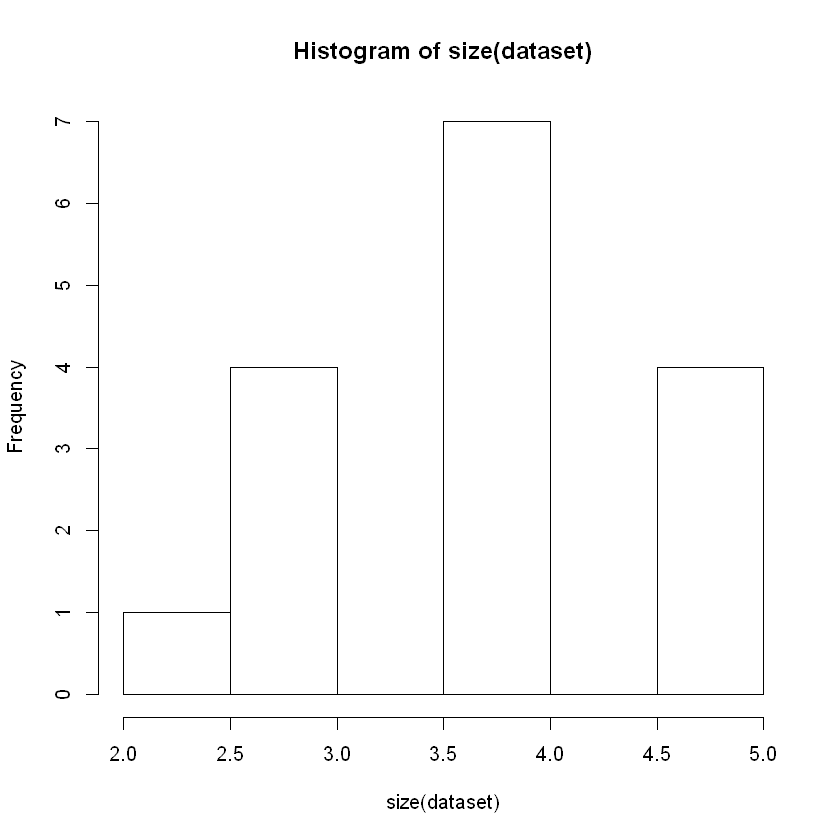

In [5]:
hist(size(dataset));

Mit $itemFrequencyPlot(dataset)$ kann nur die Häufigkeit aller Items visualisiert werden.

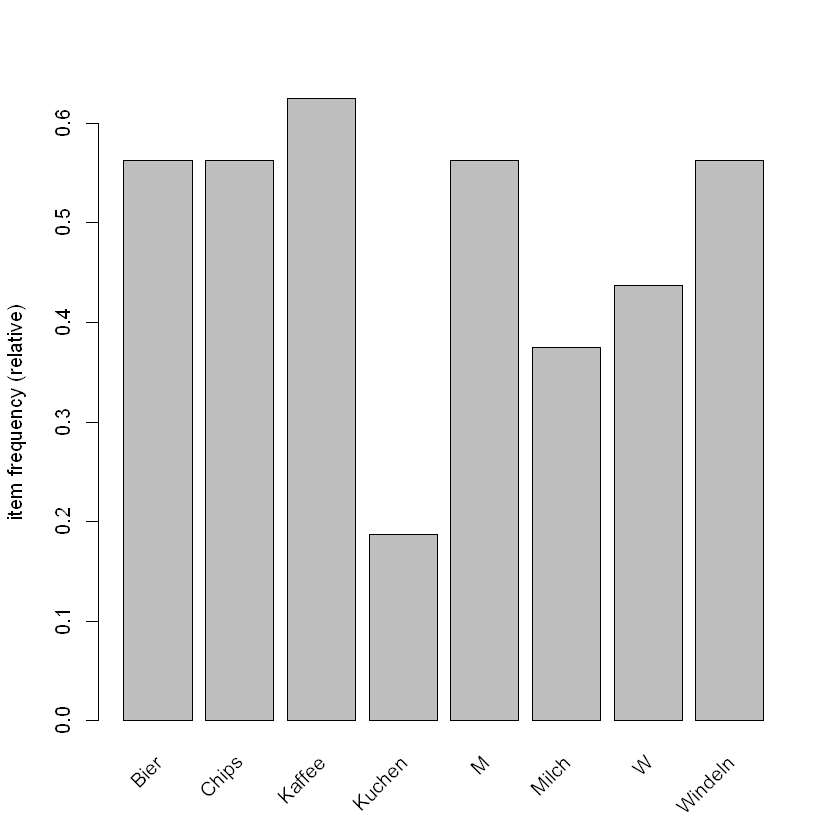

In [6]:
itemFrequencyPlot(dataset);

Mit der $crosstable$ kann man sich eine weitere Übersicht zu den Daten verschaffen, indem sie in einer Cross-Tabelle dargestellt werden.

In [7]:
crossTable(dataset);

Bier Chips Kaffee Kuchen M Milch W Windeln
Bier    9    6      6     0      8 1     1 5      
Chips   6    9      5     1      7 1     2 5      
Kaffee  6    5     10     2      5 4     5 7      
Kuchen  0    1      2     3      1 2     2 1      
M       8    7      5     1      9 0     0 5      
Milch   1    1      4     2      0 6     6 3      
W       1    2      5     2      0 6     7 4      
Windeln 5    5      7     1      5 3     4 9

Es kann außerdem zusätzlich ein Cluster Dendrogam zu den Daten erstellt werden. Dabei kann der Nutzer bereits die Zusammenhänge zwischen den Items erkennen.

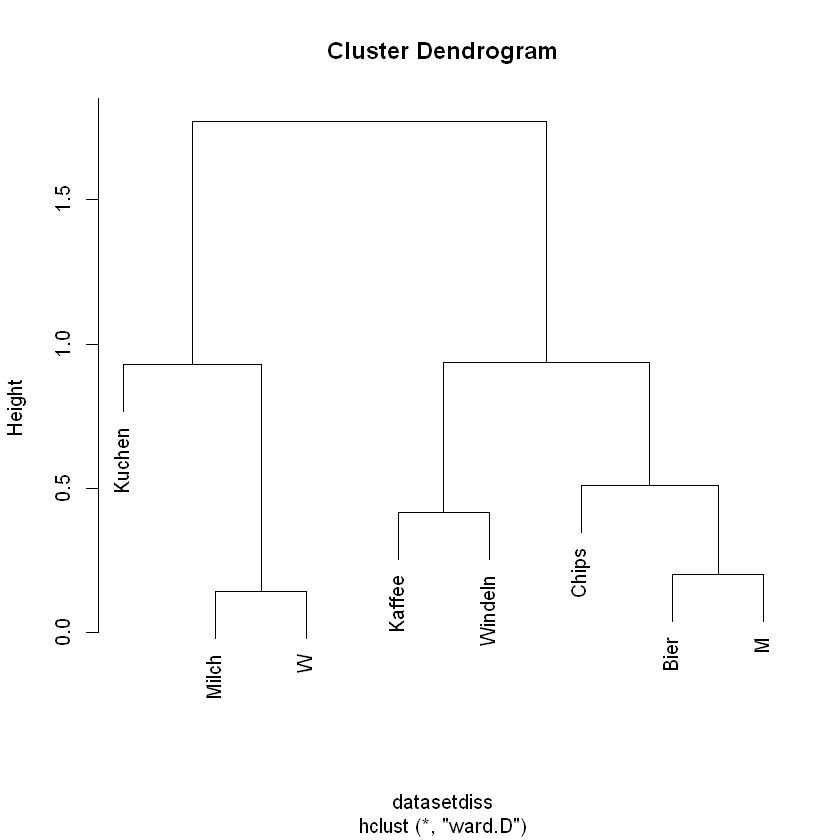

In [8]:
datasetdiss <- dissimilarity(dataset[,itemFrequency(dataset) > 0.05], method = "Jaccard", which = "items");
clustds <- hclust(datasetdiss, method = "ward.D");
plot(clustds);

Anschließend wird der Apriori Algorithmus in R durchgeführt. Dabei sucht wird nach Assoziationsregeln für die vorliegenden Daten gesucht. Die Parameter Support $supp$ und Konfidenz $conf$ müssen von Nutzer definiert werden (zwischen 0 und 1 möglich), je geringer diese Interessantheitsmaße definiert werden um so mehr Assoziationsregeln werden gefunden, wobei nicht alle von diesen eine hohe Qualität (am Lift gemessen) aufweisen. Im Dummy Datensatz werden so 151 Assoziationsregeln gefunden.

In [9]:
rules <- apriori(dataset, parameter = list(supp=0.05, conf=0.5));

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8 item(s), 16 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [151 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [10]:
summary(rules);

set of 151 rules

rule length distribution (lhs + rhs):sizes
 1  2  3  4  5 
 5 30 63 43 10 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.152   4.000   5.000 

summary of quality measures:
    support         confidence          lift      
 Min.   :0.0625   Min.   :0.5000   Min.   :0.800  
 1st Qu.:0.1250   1st Qu.:0.5714   1st Qu.:1.067  
 Median :0.2500   Median :0.7500   Median :1.383  
 Mean   :0.2148   Mean   :0.7696   Mean   :1.512  
 3rd Qu.:0.2812   3rd Qu.:1.0000   3rd Qu.:1.778  
 Max.   :0.6250   Max.   :1.0000   Max.   :2.667  

mining info:
    data ntransactions support confidence
 dataset            16    0.05        0.5

Mit $inspect(rules)$ können die Assoziationsregeln in der Console ausgegeben werden. Wurden sehr viele Regeln gefunden, wie in diesem Beispiel, so kann man die Anzeige einschränken, dies kann man von den Interessantheitsmaßen abhängig gestalten. Im Beispiel werden je die 10 Regeln mit dem höchsten Support bzw. der höchsten Konfidenz oder dem höchsten Lift abgefragt.

In [11]:
inspect(rules);

      lhs                              rhs       support confidence lift     
[1]   {}                            => {M}       0.5625  0.5625000  1.0000000
[2]   {}                            => {Chips}   0.5625  0.5625000  1.0000000
[3]   {}                            => {Bier}    0.5625  0.5625000  1.0000000
[4]   {}                            => {Windeln} 0.5625  0.5625000  1.0000000
[5]   {}                            => {Kaffee}  0.6250  0.6250000  1.0000000
[6]   {Kuchen}                      => {Milch}   0.1250  0.6666667  1.7777778
[7]   {Kuchen}                      => {W}       0.1250  0.6666667  1.5238095
[8]   {Kuchen}                      => {Kaffee}  0.1250  0.6666667  1.0666667
[9]   {Milch}                       => {W}       0.3750  1.0000000  2.2857143
[10]  {W}                           => {Milch}   0.3750  0.8571429  2.2857143
[11]  {Milch}                       => {Windeln} 0.1875  0.5000000  0.8888889
[12]  {Milch}                       => {Kaffee}  0.2500  0.66666

In [12]:
 inspect(head(sort(rules, by ="support"),10));

     lhs          rhs       support confidence lift    
[1]  {}        => {Kaffee}  0.6250  0.6250000  1.000000
[2]  {}        => {M}       0.5625  0.5625000  1.000000
[3]  {}        => {Chips}   0.5625  0.5625000  1.000000
[4]  {}        => {Bier}    0.5625  0.5625000  1.000000
[5]  {}        => {Windeln} 0.5625  0.5625000  1.000000
[6]  {M}       => {Bier}    0.5000  0.8888889  1.580247
[7]  {Bier}    => {M}       0.5000  0.8888889  1.580247
[8]  {M}       => {Chips}   0.4375  0.7777778  1.382716
[9]  {Chips}   => {M}       0.4375  0.7777778  1.382716
[10] {Windeln} => {Kaffee}  0.4375  0.7777778  1.244444


In [13]:
 inspect(head(sort(rules, by ="confidence"),10));

     lhs                 rhs      support confidence lift    
[1]  {Milch}          => {W}      0.3750  1          2.285714
[2]  {Kuchen,Milch}   => {W}      0.1250  1          2.285714
[3]  {Kuchen,W}       => {Milch}  0.1250  1          2.666667
[4]  {Kuchen,Windeln} => {Milch}  0.0625  1          2.666667
[5]  {Kuchen,Milch}   => {Kaffee} 0.1250  1          1.600000
[6]  {Kaffee,Kuchen}  => {Milch}  0.1250  1          2.666667
[7]  {Kuchen,Windeln} => {W}      0.0625  1          2.285714
[8]  {Kuchen,W}       => {Kaffee} 0.1250  1          1.600000
[9]  {Kaffee,Kuchen}  => {W}      0.1250  1          2.285714
[10] {Kuchen,M}       => {Chips}  0.0625  1          1.777778


In [14]:
 inspect(head(sort(rules, by ="lift"),10));

     lhs                        rhs      support confidence lift    
[1]  {Kuchen,W}              => {Milch}  0.1250  1.0        2.666667
[2]  {Kuchen,Windeln}        => {Milch}  0.0625  1.0        2.666667
[3]  {Kaffee,Kuchen}         => {Milch}  0.1250  1.0        2.666667
[4]  {Kaffee,Milch}          => {Kuchen} 0.1250  0.5        2.666667
[5]  {Bier,W}                => {Milch}  0.0625  1.0        2.666667
[6]  {Kuchen,W,Windeln}      => {Milch}  0.0625  1.0        2.666667
[7]  {Kaffee,Kuchen,W}       => {Milch}  0.1250  1.0        2.666667
[8]  {Kaffee,Milch,W}        => {Kuchen} 0.1250  0.5        2.666667
[9]  {Kaffee,Kuchen,Windeln} => {Milch}  0.0625  1.0        2.666667
[10] {Kaffee,Milch,Windeln}  => {Kuchen} 0.0625  0.5        2.666667


Die Darstellung kann mit einem Scatter plot erfolgen, wobei dreiachsig der Support, die Konfidenz und der Lift dargeboten werden.

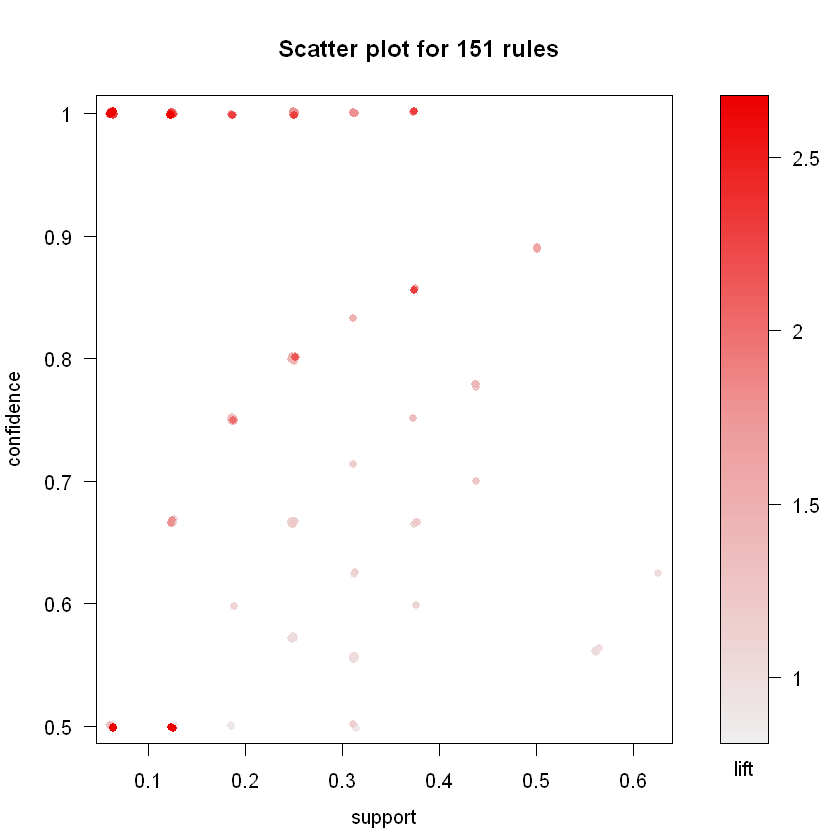

In [15]:
plot(rules, method = NULL, measure = "support", shading = "lift", interactive = FALSE, data = NULL, control = NULL);


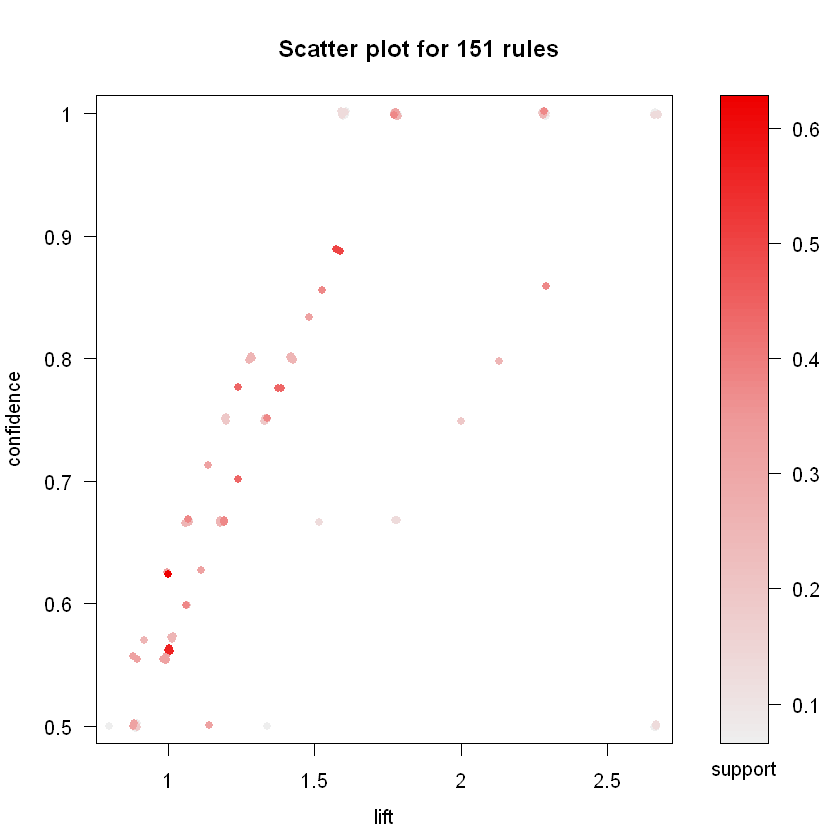

In [16]:
plot(rules, method = NULL, measure = "lift", shading = "support", interactive = FALSE, data = NULL, control = NULL);

[Kel16][WEN12]

#### Quellen


[CAR12]    https://card2brain.ch/box/kdd_kap_12_einfuehrung_und_grundlagen

[SAA03]    Helge Saathoff: "Assoziationsanalyse und Konzeptbeschreibung" (7.März 2003)

[SCH12]    Friedhelm Schwenker (Universität Ulm): "Data Mining" (16.Oktober 2012)

[PET05]    H.Petersohn: "Data Mining"(2005); Oldenbourg Verlag; Seite 101-130 

[RIE08]    Olga Riener: "Seminar 01912 Data Mining" Häufige Muster und Assoziationsregeln“(2008); http://www.tzi.de/~edelkamp/lectures/ml/slides/1-1-1_Apriori-Algorithmus.pdf 

[KEL16]         Daniela Keller: "Warenkorbanalyse in R" (2016); https://data-science-blog.com/blog/2016/10/08/warenkorbanalyse-in-r/

[WEN12]         Phil Wenker: "Warenkorbanalysen für Online Shops" (2012); http://www.seo-heads.de/analytics/warenkorbanalysen-fuer-online-shops-mit-r